In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the data
oecd_bli_df = pd.read_csv('data/oced_bli_2017.csv',thousands=',',sep=',',header=0)
imf_gdp_df = pd.read_csv('data/imf_gdp_2017.csv',thousands=',',header=0)

In [3]:
#Prepare the data
def prepare_country_stats(oecd,imf):
    stats_df = pd.merge(oecd,imf,on='Country',how='inner')
    stats_df.rename(columns={'GDP_2017_USD':'GDP_per_capita','Value':'Life_Satisfaction'},inplace=True)
    return stats_df[['Country','GDP_per_capita','Life_Satisfaction']]

country_stats = prepare_country_stats(oecd_bli_df,imf_gdp_df)
country_stats.head()

X = np.c_[country_stats['GDP_per_capita']]
y = np.c_[country_stats['Life_Satisfaction']]

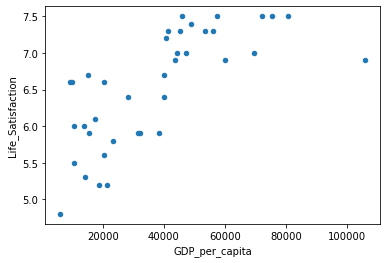

In [4]:
#Visualizing the data
country_stats.plot(kind='scatter',x='GDP_per_capita',y='Life_Satisfaction')

In [5]:
#Select a linear model.
model = LinearRegression()

In [7]:
#Train the model
model.fit(X,y)

LinearRegression()

In [8]:
y_pred = model.predict(X)

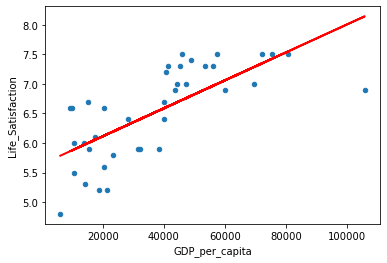

In [9]:
country_stats.plot(kind='scatter',x='GDP_per_capita',y='Life_Satisfaction')
plt.plot(X,y_pred,color='red',linewidth=2)

In [10]:
india_gdp = [[2014.01]]
india_life_sat_pred = model.predict(india_gdp)
print(india_life_sat_pred)

[[5.68867991]]


In [11]:
# Select K-Nearest Neighbour
from sklearn.neighbors import KNeighborsRegressor
knnmodel = KNeighborsRegressor(n_neighbors=5)

In [12]:
##### Train above model.
knnmodel.fit(X,y)

KNeighborsRegressor()

In [13]:
#Predition
knn_y_pred = knnmodel.predict(X)

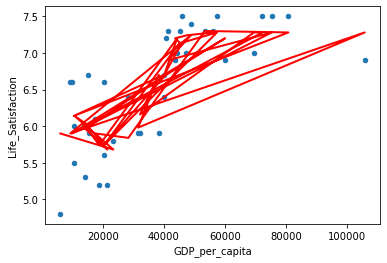

In [14]:
country_stats.plot(kind='scatter',x='GDP_per_capita',y='Life_Satisfaction')
plt.plot(X,knn_y_pred,color='red',linewidth=2)

In [15]:
knnmodel.predict(india_gdp)

array([[5.9]])